<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/60_40_Equities_and_Gold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from my_library import *

Risk Asset:  SPY
Alternative: GLD


[*********************100%***********************]  2 of 2 completed
/tmp/ipython-input-1455713053.py:2: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  data.index=pd.DatetimeIndex(data.index).to_period('B')


Price            Close                    High                     Low  \
Ticker             GLD         SPY         GLD         SPY         GLD   
Date                                                                     
2004-11-19   44.779999   79.277779   44.919998   80.155494   44.470001   
2004-11-22   44.950001   79.655914   44.970001   79.750437   44.740002   
2004-11-23   44.750000   79.777458   44.919998   79.844974   44.720001   
2004-11-24   45.049999   79.966484   45.049999   80.067755   44.790001   
2004-11-26   45.290001   79.905724   45.599998   80.331081   45.060001   
...                ...         ...         ...         ...         ...   
2026-02-03  454.290009  689.530029  459.000000  696.960022  448.309998   
2026-02-04  453.970001  686.190002  463.100006  691.450012  445.709991   
2026-02-05  441.880005  677.619995  450.899994  683.690002  440.350006   
2026-02-06  455.459991  690.619995  456.929993  692.309998  450.029999   
2026-02-09  467.029999  693.950012  467.559998  695.869995  460.850006   

Price                         Open                Return            \
Ticker             SPY         GLD         SPY       GLD       SPY   
Date                                                                 
2004-11-19   79.088733   44.490002   80.141988  0.901302 -1.111771   
2004-11-22   79.014505   44.750000   79.109028  0.379638  0.476976   
2004-11-23   79.244077   44.880001   79.622168 -0.444941  0.152586   
2004-11-24   79.703170   44.930000   79.851702  0.670389  0.236941   
2004-11-26   79.871968   45.250000   80.013752  0.532745 -0.075982   
...                ...         ...         ...       ...       ...   
2026-02-03  684.030029  452.630005  696.210022  6.358721 -0.845536   
2026-02-04  681.760010  462.470001  690.349976 -0.070441 -0.484392   
2026-02-05  675.789978  444.290009  680.940002 -2.663171 -1.248926   
2026-02-06  680.849976  450.730011  681.460022  3.073229  1.918479   
2026-02-09  688.340027  461.390015  689.419983  2.540291  0.482178   

Price           Volume            Weight         Return  Cumulative  \
Ticker             GLD        SPY    GLD  SPY Portfolio         SPY   
Date                                                                  
2004-11-19  11655300.0   54276500    0.4  0.6 -0.306542   -1.111771   
2004-11-22  11996000.0   37560200    0.4  0.6  0.438041   -0.640098   
2004-11-23   3169200.0   41968800    0.4  0.6 -0.086425   -0.488489   
2004-11-24   6105100.0   29724800    0.4  0.6  0.410321   -0.252705   
2004-11-26   3097700.0   15487700    0.4  0.6  0.167509   -0.328495   
...                ...        ...    ...  ...       ...         ...   
2026-02-03  28703500.0  107904600    0.4  0.6  2.036166  760.094780   
2026-02-04  24427900.0  105204600    0.4  0.6 -0.318812  755.928551   
2026-02-05  17718100.0  113610800    0.4  0.6 -1.814624  745.238635   
2026-02-06  12663900.0   89127600    0.4  0.6  2.380379  761.454364   
2026-02-09  12234900.0   73570500    0.4  0.6  1.305423  765.608106   

Price                                
Ticker             GLD    Portfolio  
Date                                 
2004-11-19    0.901302    -0.306542  
2004-11-22    1.284362     0.130156  
2004-11-23    0.833706     0.043619  
2004-11-24    1.509685     0.454119  
2004-11-26    2.050473     0.622388  
...                ...          ...  
2026-02-03  923.636768   986.568566  
2026-02-04  922.915706   983.104460  
2026-02-05  895.673714   963.450186  
2026-02-06  926.273052   988.764335  
2026-02-09  952.343370  1002.977315  

[5338 rows x 18 columns]

18:25:48 Mean-Variance Optimal Fully Invested Portfolio is 44:56.


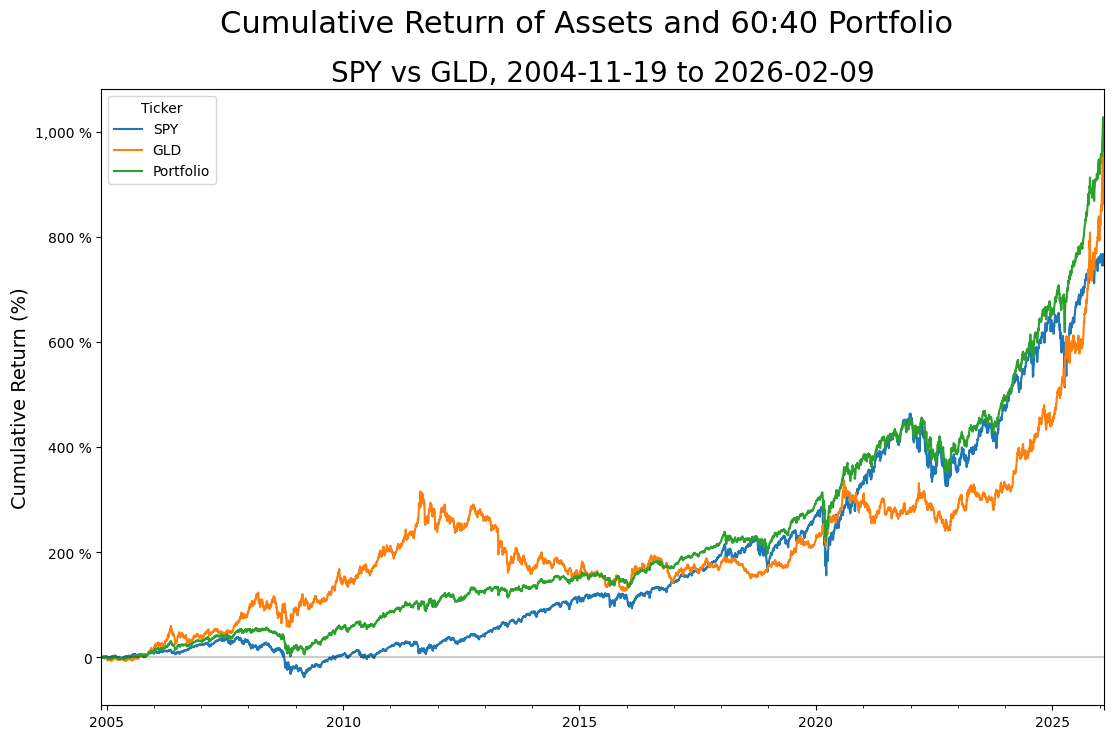

In [11]:
data=download(tickers:=[(market:=input("Risk Asset:  ")),(alternative:=input("Alternative: "))],"1990-01-01",today("%Y-%m-%d"),auto_adjust=True)
data.index=pd.DatetimeIndex(data.index).to_period('B')
#data=data.resample('M').last()

for ticker in tickers:
    data[('Return',ticker)]=data[('Close',ticker)].pct_change()*hundred
    data[('Weight',ticker)]=0.6 if ticker==market else 0.4

data.dropna(inplace=True)
data.sort_index(axis=1,inplace=True)
data[('Return','Portfolio')]=data.apply(lambda x:np.sum(x[('Weight',)]*x[('Return',)]),axis=1)

for ticker in tickers+['Portfolio']:
    data[('Cumulative',ticker)]=(data[('Return',ticker)]/hundred+one).cumprod()*hundred-hundred

figure,plot=pl.subplots(figsize=(8*GoldenRatio,8))
data['Cumulative'].plot(ax=plot)
figure.suptitle(title:='Cumulative Return of Assets and 60:40 Portfolio',fontsize=22)
plot.set_title(subtitle:="%s, %s to %s" % (" vs ".join(tickers),data.index[0],data.index[-1]),fontsize=20)
plot.set_xlabel(None)
plot.set_ylabel('Cumulative Return (%)',fontsize=14)
plot.yaxis.set_major_formatter(PercentLabels(0))
plot.axhline(color='black',alpha=0.2)
figure.savefig(title+".png",dpi=300,bbox_inches='tight')

display(data)

s1,s12,s12,s2=data['Return'][tickers].cov().to_numpy().reshape(4)
w1=(s2**2-s12)/(s1**2+s2**2-two*s12)
w2=one-w1
nprint("Mean-Variance Optimal Fully Invested Portfolio is %.0f:%0.f." % (w1*hundred,w2*hundred))

In [12]:
from warnings import filterwarnings ; filterwarnings('ignore',category=pd.errors.PerformanceWarning)

report=pd.DataFrame({'Weight':np.arange(zero,one+(delta:=0.05),delta)}).set_index("Weight")

if data.index.dtype==pd.PeriodDtype('W'):
    annualize=52e0

elif data.index.dtype==pd.PeriodDtype('M'):
    annualize=12e0

elif data.index.dtype==pd.PeriodDtype('Q'):
    annualize=4e0

elif data.index.dtype==pd.PeriodDtype('Y'):
    annualize=1e0

else:
    annualize=252e0

for weight in (p:=tqdm(report.index)):
    report.loc[weight,market]=weight
    report.loc[weight,alternative]=one-weight

    for ticker in tickers:
        data[('Weight',ticker)]=report.loc[weight,ticker]

    if ('Return','Portfolio') in data.columns:
        data.drop(('Return','Portfolio'),axis=1,inplace=True)

    data[('Return','Portfolio')]=data.apply(lambda x:np.sum(x[('Weight',)]*x[('Return',)]),axis=1)

    report.loc[weight,'Sample']=(r:=data[('Return','Portfolio')]).count()
    report.loc[weight,'Mean']=(m:=r.mean())
    report.loc[weight,'Std.Dev.']=(s:=r.std())
    report.loc[weight,'Std.Err.']=r.sem()
    report.loc[weight,'Kurtosis']=r.kurt()+three
    p.set_description("%+.1f" % (m/s*annualize**half))

report['Sharpe']=report['Mean']/report['Std.Dev.']*annualize**half
report['Sharpe S.E.']=((annualize/report['Sample'])*(one+(report['Kurtosis']-one)/four*report['Sharpe']**two))**half
report['Annualized']=hundred*(one+report['Mean']/hundred)**annualize-hundred

display(report)

  0%|          | 0/21 [00:00<?, ?it/s]

,SPY,GLD,Sample,Mean,Std.Dev.,Std.Err.,Kurtosis,Sharpe,Sharpe S.E.,Annualized
Weight,,,,,,,,,,
0.00,0.00,1.00,5338.0,0.050495,1.129636,0.015461,9.968419,0.709600,0.317027,13.566261
0.05,0.05,0.95,5338.0,0.050350,1.078062,0.014756,9.937607,0.741410,0.324333,13.524761
0.10,0.10,0.90,5338.0,0.050205,1.030122,0.014099,9.913179,0.773678,0.331928,13.483277
0.15,0.15,0.85,5338.0,0.050060,0.986346,0.013500,9.906540,0.805679,0.339767,13.441807
0.20,0.20,0.80,5338.0,0.049915,0.947313,0.012966,9.936947,0.836446,0.347856,13.400353
0.25,0.25,0.75,5338.0,0.049770,0.913628,0.012505,10.033028,0.864763,0.356276,13.358914
0.30,0.30,0.70,5338.0,0.049625,0.885905,0.012125,10.231844,0.889225,0.365188,13.317490
0.35,0.35,0.65,5338.0,0.049480,0.864714,0.011835,10.573494,0.908352,0.374747,13.276081
0.40,0.40,0.60,5338.0,0.049335,0.850546,0.011641,11.090514,0.920775,0.384937,13.234687


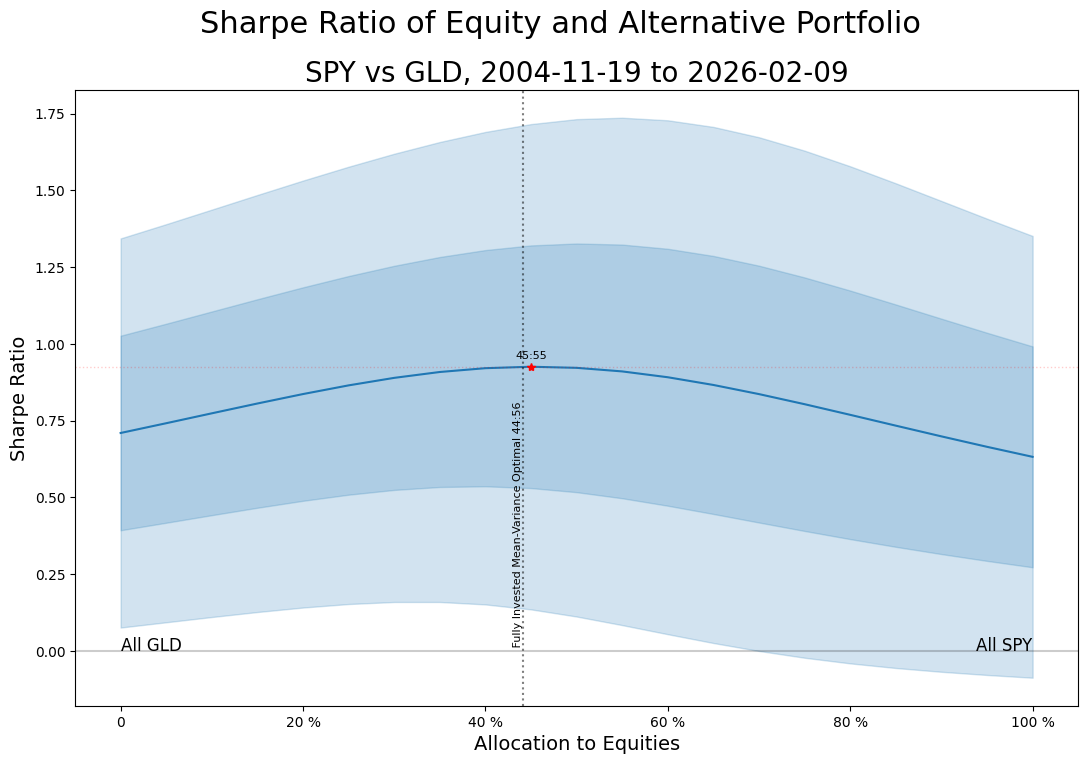

In [13]:
figure,plot=pl.subplots(figsize=(8*GoldenRatio,8))
plot.plot((x:=report.index.to_numpy())*hundred,y:=report.loc[x,'Sharpe'].to_numpy())
plot.fill_between(x*hundred,y+(ye:=report.loc[x,'Sharpe S.E.']),y-ye,color='C0',alpha=0.2)
plot.fill_between(x*hundred,y+two*ye,y-two*ye,color='C0',alpha=0.2)
figure.suptitle(title:='Sharpe Ratio of Equity and Alternative Portfolio',fontsize=22)
plot.set_title(subtitle,fontsize=20)
plot.set_xlabel('Allocation to Equities',fontsize=14)
plot.set_ylabel('Sharpe Ratio',fontsize=14)
plot.xaxis.set_major_formatter(PercentLabels(0))
plot.text(zero,zero,"All "+alternative,fontsize=12,horizontalalignment='left')
plot.text(hundred,zero,"All "+market,fontsize=12,horizontalalignment='right')
plot.axhline(color='black',alpha=0.2)
plot.plot(x[(omega:=y.argmax())]*hundred,y[omega],'r*')
plot.text(x[omega]*hundred,y[omega]*1.02,'%.0f:%.0f' % (x[omega]*hundred,hundred-x[omega]*hundred),fontsize=8,ha='center',va='bottom')
plot.axhline(y[omega],color='red',linestyle=':',linewidth=1,alpha=0.2)
plot.axvline(w1*hundred,color='black',linestyle=':',alpha=0.5)
plot.text(w1*hundred,zero,' Fully Invested Mean-Variance Optimal %.0f:%0.f' % (w1*hundred,w2*hundred),rotation=90,ha='right',va='bottom',fontsize=8)
figure.savefig(title+".png",dpi=300,bbox_inches='tight')

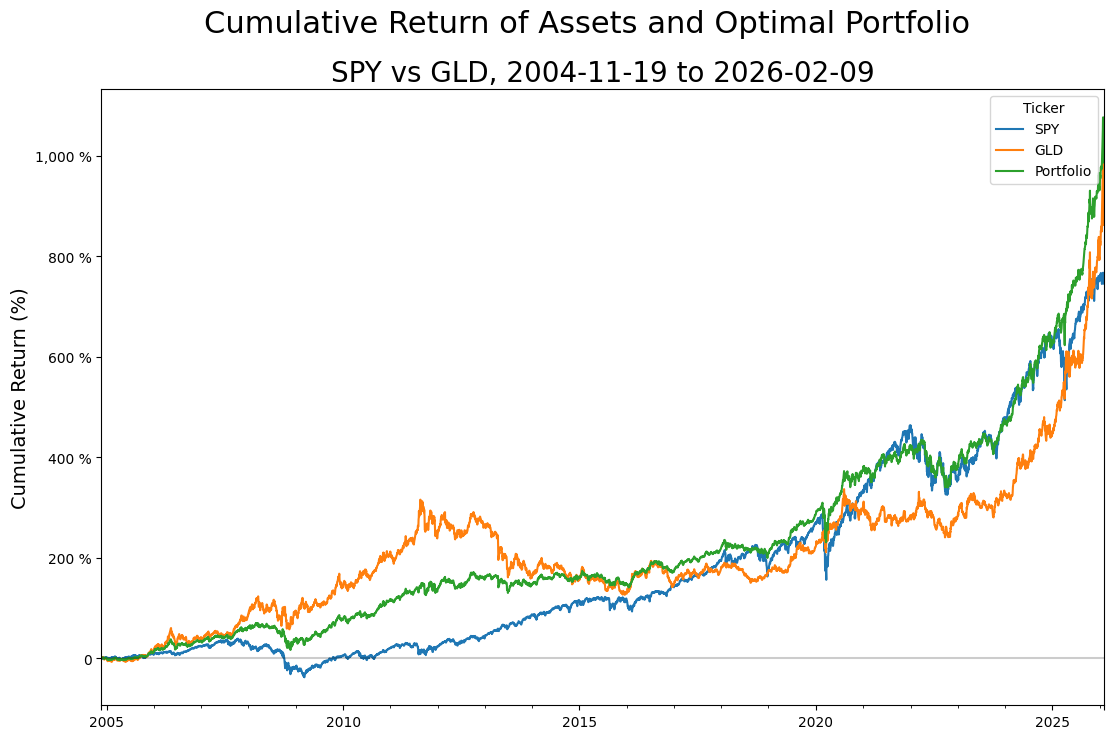

In [14]:
weight=x[y.argmax()]

for ticker in tickers:
    data[('Weight',ticker)]=report.loc[weight,ticker]

data.drop(('Return','Portfolio'),axis=1,inplace=True)
data[('Return','Portfolio')]=data.apply(lambda x:np.sum(x[('Weight',)]*x[('Return',)]),axis=1)
data[('Cumulative','Portfolio')]=(data[('Return','Portfolio')]/hundred+one).cumprod()*hundred-hundred

figure,plot=pl.subplots(figsize=(8*GoldenRatio,8))
data['Cumulative'].plot(ax=plot)
figure.suptitle(title:='Cumulative Return of Assets and Optimal Portfolio',fontsize=22)
plot.set_title(subtitle:="%s, %s to %s" % (" vs ".join(tickers),data.index[0],data.index[-1]),fontsize=20)
plot.set_xlabel(None)
plot.set_ylabel('Cumulative Return (%)',fontsize=14)
plot.yaxis.set_major_formatter(PercentLabels(0))
plot.axhline(color='black',alpha=0.2)
figure.savefig(title+".png",dpi=300,bbox_inches='tight')

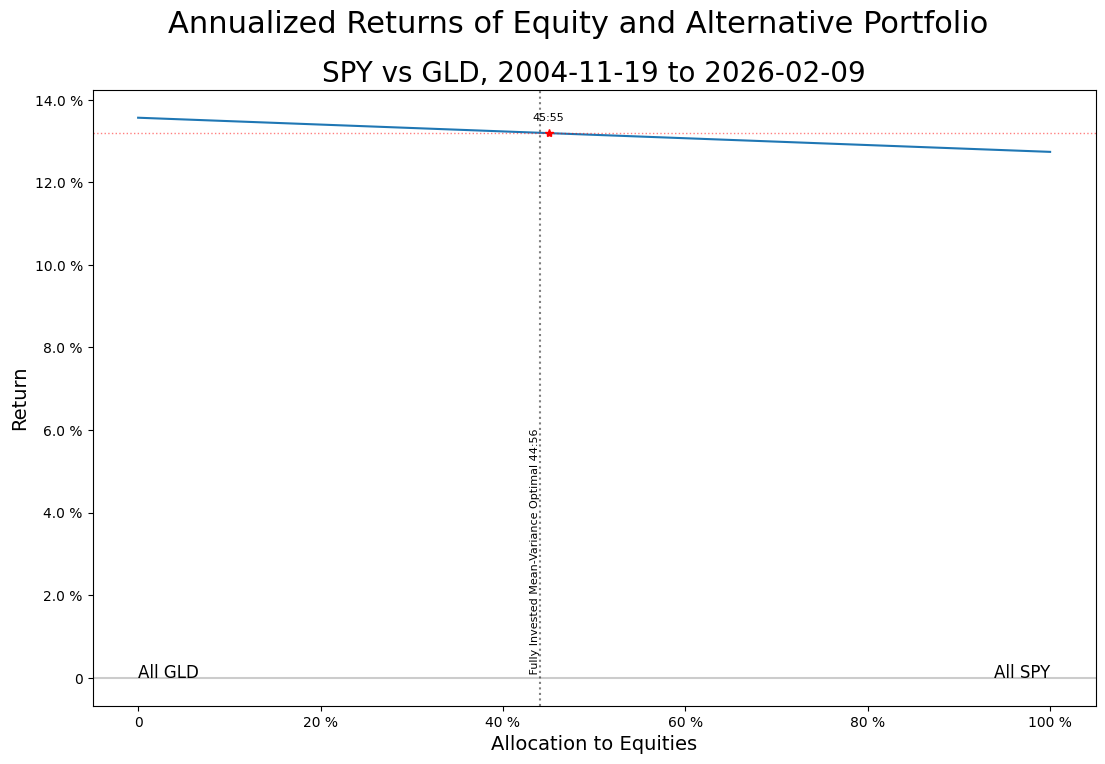

In [15]:
figure,plot=pl.subplots(figsize=(8*GoldenRatio,8))
plot.plot((x:=report.index.to_numpy())*hundred,y:=report.loc[x,'Annualized'].to_numpy())
figure.suptitle(title:='Annualized Returns of Equity and Alternative Portfolio',fontsize=22)
plot.set_title(subtitle,fontsize=20)
plot.set_xlabel('Allocation to Equities',fontsize=14)
plot.set_ylabel('Return',fontsize=14)
plot.xaxis.set_major_formatter(PercentLabels(0))
plot.yaxis.set_major_formatter(PercentLabels(1))
plot.text(zero,zero,"All "+alternative,fontsize=12,horizontalalignment='left')
plot.text(hundred,zero,"All "+market,fontsize=12,horizontalalignment='right')
plot.axhline(color='black',alpha=0.2)
plot.plot(x[omega]*hundred,y[omega],'r*')
plot.text(x[omega]*hundred,y[omega]*1.02,'%.0f:%.0f' % (x[omega]*hundred,hundred-x[omega]*hundred),fontsize=8,ha='center',va='bottom')
plot.axvline(w1*hundred,color='black',linestyle=':',alpha=0.5)
plot.text(w1*hundred,zero,' Fully Invested Mean-Variance Optimal %.0f:%0.f' % (w1*hundred,w2*hundred),rotation=90,ha='right',va='bottom',fontsize=8)
plot.axhline(y[omega],color='red',linestyle=':',linewidth=1,alpha=0.5)
figure.savefig(title+".png",dpi=300,bbox_inches='tight')